# <font color='blue'>SENG 474 - Assignment 1 (Experiments and Analysis)</font>


Student Name:  Mek Obchey \
Student ID:    V00880355 \
Spring 2020


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# This part is for preprocesssing the data
# Read data, clean it, then split

df = pd.read_csv('./processed.cleveland.data')
df = df.replace('?',np.NaN)
df.apply(pd.to_numeric)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Group labels into two sets {0} = 0 and {1,2,3,4} = 1
y[y > 0] = 1

# replace missing values denoted '?' with the mean of its column 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean', verbose=0)
imputer.fit(X[:])
X[:,:] = imputer.transform(X[:])

# splitting the dataset into the Training set and Test set by 20%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [107]:
# Calculate train vs test error of decision tree or random forest.
def calculate_errors(classifier, parameter, param_range):
    train_errors = list()
    test_errors = list()
    for i in param_range:
        eval('classifier.set_params(' + parameter + '=i)')
        classifier.fit(X_train, y_train)
        train_errors.append(classifier.score(X_train, y_train))
        test_errors.append(classifier.score(X_test, y_test))
    return (train_errors, test_errors)

def graph_train_test_errors(train_errors, test_errors, param, param_range, title):
    ############## Optimal Parameter ############
    i_param_optim = np.argmax(test_errors)
    param_optim = param_range[i_param_optim]
    print("Optimal parameter : %s" % param_optim)
    #############################################
    lw = 2
    plt.plot(param_range, train_errors, label="Train",color="darkorange", lw=lw)
    plt.plot(param_range, test_errors, label="Test",  color="navy", lw=lw)
    plt.vlines(param_optim, plt.ylim()[0], np.max(test_errors), color='k',
               linewidth=lw, label='Optimum on test')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Performance Measure' + title)
    plt.xlabel('Number of ' + param.upper())
    plt.ylabel('Performance')
    plt.autoscale()
    plt.show()
    

# <font color='blue'> Decision Tree (with pruning)</font>

## DT Test 1: Testing Different Test Size

This part shows the effect of limiting the number of features allowed in two decision trees (Gini vs Entropy)

Optimal parameter : 0.30000000000000004


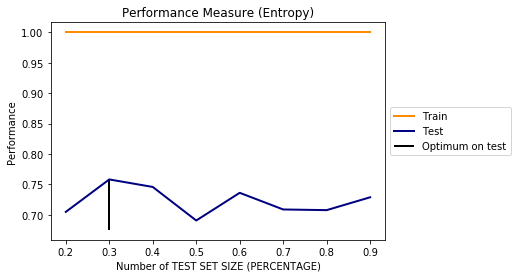

Optimal parameter : 0.30000000000000004


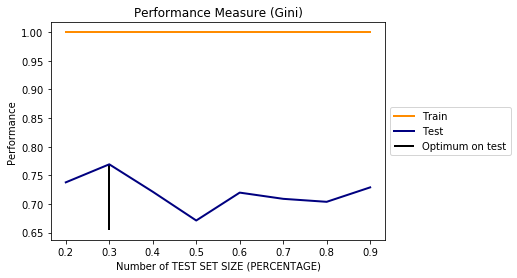

In [108]:

def test_size_error(classifier, pmin=20, pmax=100, step=10):
    train_errors = list()
    test_errors = list()
    for i in range(pmin, pmax, step):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state = 0)
        classifier.fit(X_train, y_train)
        train_errors.append(classifier.score(X_train, y_train))
        test_errors.append(classifier.score(X_test, y_test))
    return (train_errors, test_errors)
    
    
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    
models = {
    'entropy':test_size_error(classifier1),
    'gini':test_size_error(classifier2)
} 

param = 'Test set size (percentage)'
param_range = np.arange(0.2,1,0.1)

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()


## DT Test 2-1: Tuning max_features with 20% test split

This part shows the effect of limiting the number of features allowed in two decision trees (Gini vs Entropy)

Optimal parameter : 8


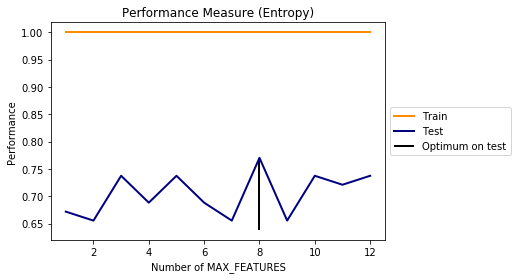

Optimal parameter : 10


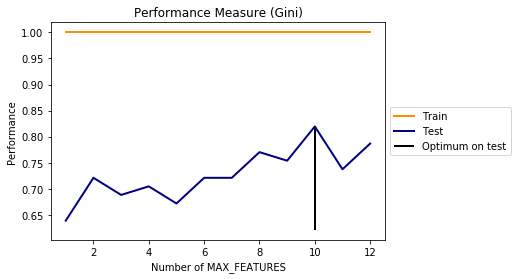

In [191]:
from sklearn.tree import DecisionTreeClassifier

# reset test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    
# Parameter to test
param = 'max_features'
param_range = np.arange(1, 13, 1)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

## DT Test 2-2: Tuning max_features with 20% split comparing with 30% split

Similar to the previous cell, but also graph the result of 30% split

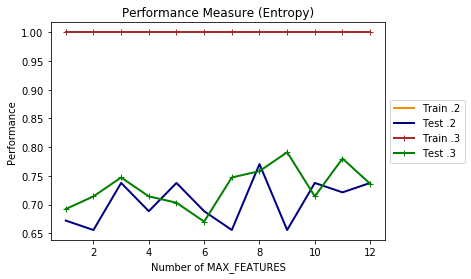

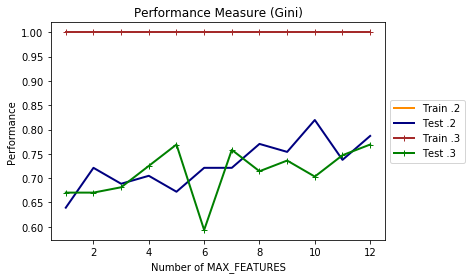

In [216]:
from sklearn.tree import DecisionTreeClassifier

# reset test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

models = {
    'entropy_20':calculate_errors(classifier1, param, param_range),
    'gini_20':calculate_errors(classifier2, param, param_range)
} 

        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
classifier3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

models['entropy_30'] = calculate_errors(classifier3, param, param_range)
models['gini_30'] = calculate_errors(classifier4, param, param_range)


# Parameter to test
param = 'max_features'
param_range = np.arange(1, 13, 1)

lw = 2
plt.plot(param_range, models['entropy_20'][0], label="Train .2",color="darkorange", lw=lw)
plt.plot(param_range, models['entropy_20'][1], label="Test .2", color="navy", lw=lw)
plt.plot(param_range, models['entropy_30'][0], label="Train .3", color="brown", marker='+',lw=lw)
plt.plot(param_range, models['entropy_30'][1], label="Test .3",  color="green", marker='+',lw=lw)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance Measure (Entropy)')
plt.xlabel('Number of ' + param.upper())
plt.ylabel('Performance')
plt.autoscale()
plt.show()



plt.plot(param_range, models['gini_20'][0], label="Train .2",color="darkorange", lw=lw)
plt.plot(param_range, models['gini_20'][1], label="Test .2", color="navy", lw=lw)
plt.plot(param_range, models['gini_30'][0], label="Train .3", color="brown", marker='+',lw=lw)
plt.plot(param_range, models['gini_30'][1], label="Test .3",  color="green", marker='+',lw=lw)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance Measure (Gini)')
plt.xlabel('Number of ' + param.upper())
plt.ylabel('Performance')
plt.autoscale()
plt.show()


# models.clear()

## DT Test 3: Tuning max_depth 

Optimal parameter : 3


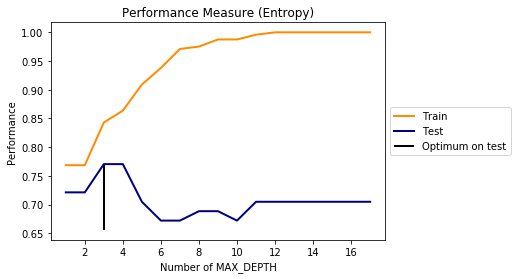

Optimal parameter : 3


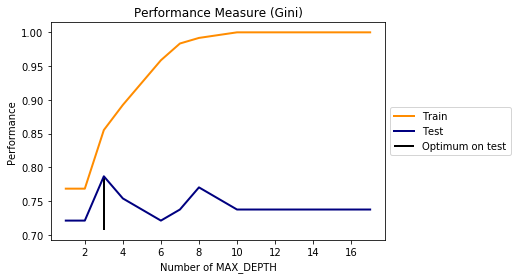

In [120]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    
# Parameter to test
param = 'max_depth'
param_range = np.arange(1,18,1)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

## DT Test 4: Tuning ccp_alpha (cost-complexity pruning parameter)

This test uses Minimal cost-complexity pruning algorithm, provided by sklearn library, to prune the trees

Optimal parameter : 0.02


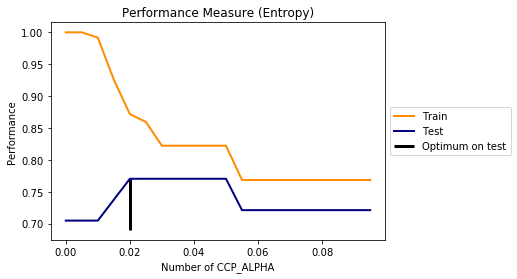

Optimal parameter : 0.01


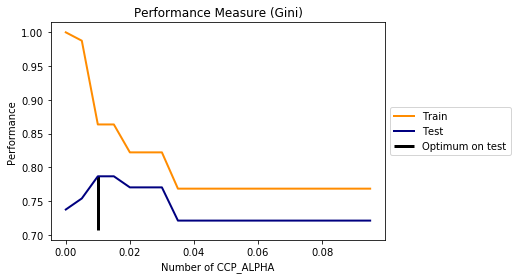

In [5]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    
# Parameter to test
param = 'ccp_alpha'
param_range = np.arange(0, 0.1, 0.005)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

# <font color='blue'> Random Forest (no pruning) </font>

## RF Test 1: n_estimators with sqrt(d) split


Optimal parameter : 6


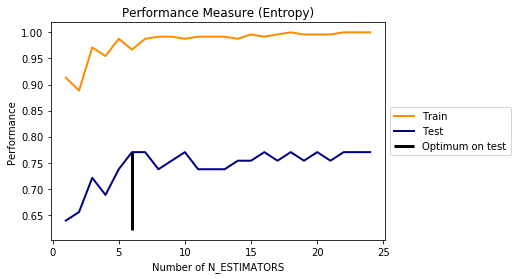

Optimal parameter : 3


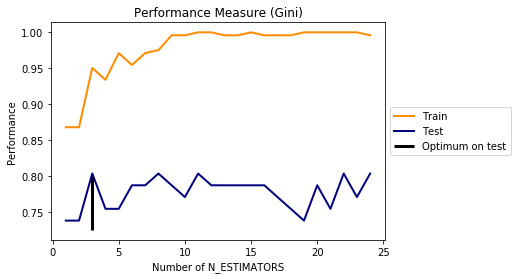

In [6]:
from sklearn.ensemble import RandomForestClassifier


#Question max_features = sqrt(d) is it chosen randomly?
classifier1 = RandomForestClassifier(criterion='entropy', max_features= 'sqrt', random_state=0, n_jobs=2)
classifier2 = RandomForestClassifier(criterion='gini', max_features = 'sqrt', random_state=0, n_jobs=2)

# Parameter to test
param = 'n_estimators'
param_range = np.arange(1, 25, 1)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

## RF Test 2: n_estimators with 'd' features split


Optimal parameter : 7


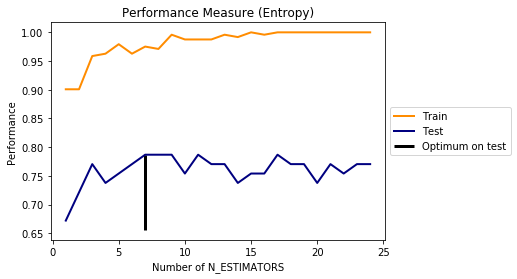

Optimal parameter : 5


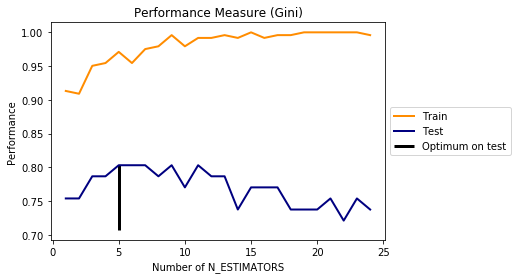

In [7]:
from sklearn.ensemble import RandomForestClassifier


#Question max_features = sqrt(d) is it chosen randomly?
classifier1 = RandomForestClassifier(criterion='entropy', max_features= None, random_state=0, n_jobs=2)
classifier2 = RandomForestClassifier(criterion='gini', max_features = None, random_state=0, n_jobs=2)

# Parameter to test
param = 'n_estimators'
param_range = np.arange(1, 25, 1)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

# <font color='blue'> Neural Networks </font>

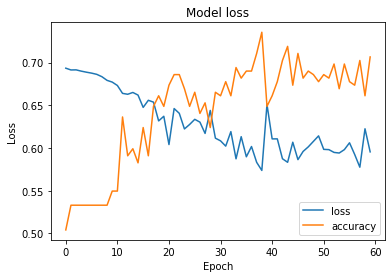

In [157]:
# this part takes a few seconds to run


def graph_neural_history(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.show()


import tensorflow as tf
from tensorflow import keras

classifier = keras.Sequential()
classifier.add(keras.layers.Dense(input_shape=(13,), units = 13, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(keras.layers.Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(keras.layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
sgd = keras.optimizers.SGD(lr=0.01)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(
    tf.convert_to_tensor(X_train, dtype=tf.float32),
    tf.convert_to_tensor(y_train, dtype=tf.float32), 
    batch_size=10, epochs = 60, verbose=0
)

graph_neural_history(history)

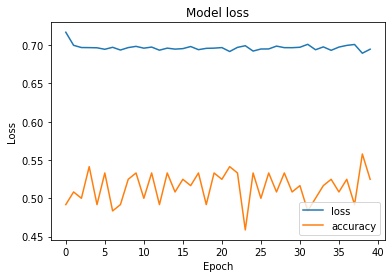

In [158]:
# this part takes a few seconds to run


import tensorflow as tf
from tensorflow import keras

classifier = keras.Sequential()
classifier.add(keras.layers.Dense(input_shape=(13,), units = 13, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(keras.layers.Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(keras.layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
sgd = keras.optimizers.SGD(lr=0.5)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(
    tf.convert_to_tensor(X_train, dtype=tf.float32),
    tf.convert_to_tensor(y_train, dtype=tf.float32), 
    batch_size=10, epochs = 40, verbose=0
)

graph_neural_history(history)

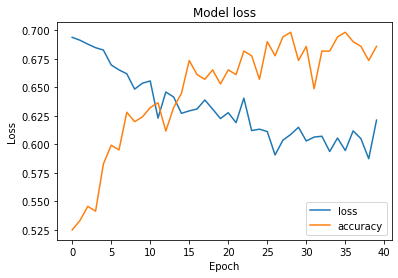

In [159]:
# this part takes a few seconds to run


import tensorflow as tf
from tensorflow import keras

classifier = keras.Sequential()
classifier.add(keras.layers.Dense(input_shape=(13,), units = 13, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(keras.layers.Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(keras.layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
sgd = keras.optimizers.SGD(lr=0.01)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(
    tf.convert_to_tensor(X_train, dtype=tf.float32),
    tf.convert_to_tensor(y_train, dtype=tf.float32), 
    batch_size=5, epochs = 40, verbose=0
)

graph_neural_history(history)

## References: 
The ideas of each model are taken from examples shown on sklearn: \
https://scikit-learn.org
\
\
Basic plotting are taken from: \
https://matplotlib.org/tutorials/
\
\
Ploting train error vs test error (by Alexandre Gramfort): \
https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html